### Problem Statement :

Customer churn is the percentage of customers that stopped using your company's product or service during a certain time frame. Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

### Objective

Develop a machine learning model to predict customer churn based on historical customer data. You 
will follow a typical machine learning project pipeline, from data preprocessing to model deployment.

### DataDescription
You are provided with a dataset containing historical customer information, including customer 
attributes, interactions, and whether they churned or not. The dataset is in CSV format.

### Goal:
Aim of building and comparing several customer churn prediction models.

Customer churn is when a company’s customers stop doing business with that company.It is categorical data. It consists of Yes and No. Hence here we would be using binary classifications. Yes means they have stopped and No means they continue with company.

Target:

Churn — Whether the customer churned or not (Yes, No)

### Importing All Requaired Libraries

In [61]:
#Importing required packages.

import pandas as pd
import numpy as np
import scipy.stats as st

#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns


#feature engineering

from sklearn.preprocessing import StandardScaler, LabelEncoder

#scipy for zscore
from scipy.stats import zscore


# Importing useful libraries for model training

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Ensemble Techniques...

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

#ML models for regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Model selection libraries...
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV

# Importing some metrics we can use to evaluate our model performance....
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,log_loss
from sklearn.metrics import roc_auc_score, roc_curve, auc, plot_roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore')

In [2]:
#loading data sets
df = pd.read_excel('E:\sunbasedata\customer_churn_large_dataset.xlsx')

# No. of rows and columns 
df.shape

(100000, 9)

In [3]:
# column names
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [4]:
#show all columns in dataframe
pd.set_option('display.max_columns', None)

df.head(5)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


## Data Analysis

### Checking for null value

In [5]:
# Total null value present in dataset
df.isnull().sum().sum()

0

In [6]:
# find out in which column missing value is present

[features for features in df.columns if df[features].isnull().sum()>0]

[]

<AxesSubplot:>

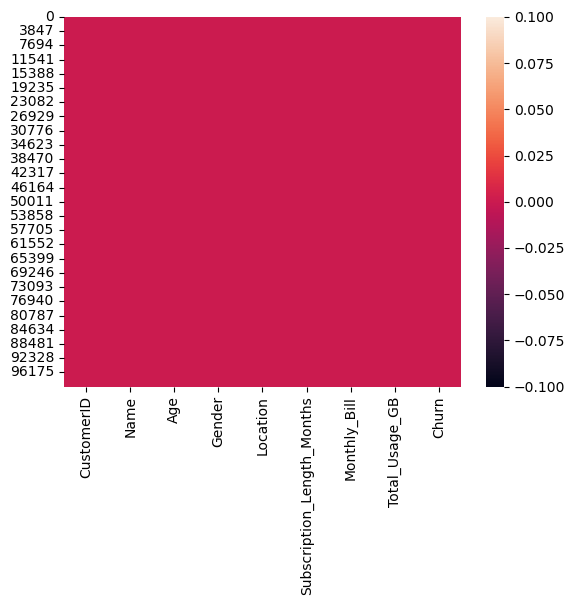

In [7]:
sns.heatmap(df.isnull())##check missing value through visualization

There are no null or missing values in data set if missing value is present then we can impute the missing value by using simple imputer or we can use fillna method by replace it by mean and median if our variable is numeric and mode if our variable is categorical.One more thing is that if missing value of any column is greater than 50% then we can drop it.

### Check for Duplicate value

In [8]:
df.duplicated().sum()

0

In [9]:
# if duplicate value present drop this row
df.drop_duplicates(subset=['CustomerID'])

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


no duplicate present there because the row and column value is same

### Checking datatypes of columns

In [10]:
# check datatypes and memory captured
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB



 There is both numerical and categorical type of data is present.



### Check unique values present in each Column

In [11]:
df.nunique().to_frame("Unique Values")

,Unique Values
CustomerID,100000
Name,100000
Age,53
Gender,2
Location,5
Subscription_Length_Months,24
Monthly_Bill,7001
Total_Usage_GB,451
Churn,2


The unique value of customerID,Monthly_Bill,Total_Usage_GB and Name is maximum so we seperate this columnand findout unique value of other column

In [12]:
temp_col = [col for col in df.columns if col not in ("CustomerID","Name","Age","Monthly_Bill","Total_Usage_GB")]

In [13]:
temp_col

['Gender', 'Location', 'Subscription_Length_Months', 'Churn']

In [14]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in temp_col:
        print(i)
        print(df[i].value_counts())
        print('************************************************')

Gender
Female    50216
Male      49784
Name: Gender, dtype: int64
************************************************
Location
Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64
************************************************
Subscription_Length_Months
20    4303
22    4267
1     4247
16    4229
2     4228
14    4213
7     4211
11    4200
6     4184
5     4171
18    4171
12    4155
21    4154
13    4154
10    4151
3     4136
9     4134
15    4122
24    4113
8     4106
19    4106
4     4098
23    4083
17    4064
Name: Subscription_Length_Months, dtype: int64
************************************************
Churn
0    50221
1    49779
Name: Churn, dtype: int64
************************************************


## Data Cleanning

Create new feature tenure which is more understandable and usefull for model building and prediction  with the help of Subscription_Length_Months column.

In [15]:
df["Subscription_Length_Months"].max()

24

In [16]:
df["Subscription_Length_Months"].min()

1

In [17]:
def month_to_year(df):
    if df["Subscription_Length_Months"] <=3:
        return "Quatrly"
    elif (df["Subscription_Length_Months"] > 3) & (df["Subscription_Length_Months"] <= 6):
        return "half_yearly"
    elif (df["Subscription_Length_Months"] > 6) & (df["Subscription_Length_Months"] <= 12) :
        return "yearly"
    elif (df["Subscription_Length_Months"] > 12) & (df["Subscription_Length_Months"] <= 24) :
        return "1-2 year"
df["Tenure_Group"] = df.apply(lambda df:month_to_year(df),axis = 1)

In [18]:
df.head(5)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Tenure_Group
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,1-2 year
1,2,Customer_2,62,Female,New York,1,48.76,172,0,Quatrly
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,half_yearly
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,Quatrly
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,1-2 year


### Create range for Age 

In [19]:
df['Age'].min()

18

In [20]:
df['Age'].max()

70

In [21]:
# Create new variable for OCLTV Range
df['Age_group'] = pd.cut(df.Age,[17,25,35,55,70],4,labels=['Teeanager','young','midle_Age',"older"])


In [22]:
df['Age_group'].value_counts()

midle_Age    37841
older        28337
young        18838
Teeanager    14984
Name: Age_group, dtype: int64

In [23]:
df['Age_group']=df['Age_group'].astype('object')

### Drop unnecessary columns

Drop column customerID,Name which has lots of unique value and no need for model prediction.

Drop column Subscription_Length_Months because I added new column tenure_group which is more understandable .

In [24]:
#remove modified and unimportant columnscolumns

df.drop(['CustomerID', 'Name','Subscription_Length_Months',"Age"
         ],axis=1,inplace=True)

In [25]:
df.columns

Index(['Gender', 'Location', 'Monthly_Bill', 'Total_Usage_GB', 'Churn',
       'Tenure_Group', 'Age_group'],
      dtype='object')

### Convert int from float value

In [26]:
df['Monthly_Bill']=df['Monthly_Bill'].astype('int')

In [27]:
df.sample(5)

,Gender,Location,Monthly_Bill,Total_Usage_GB,Churn,Tenure_Group,Age_group
1925,Female,Houston,39,263,1,yearly,midle_Age
36660,Male,New York,57,284,0,Quatrly,older
9121,Male,Chicago,84,111,0,Quatrly,Teeanager
932,Female,Chicago,67,278,0,Quatrly,older
50524,Female,Houston,73,182,1,1-2 year,Teeanager


## Univariate  Visuallization

### Pie Chart

### TOP 5 Location

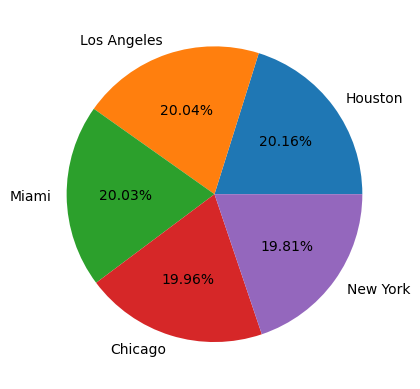

In [28]:
Location_values=df.Location.value_counts().values
Location_name=df.Location.value_counts().index
plt.pie(Location_values[:5],labels=Location_name[:5],autopct='%1.2f%%');



Findout how much percent customer is churn or not.

0- not churn

1- churn

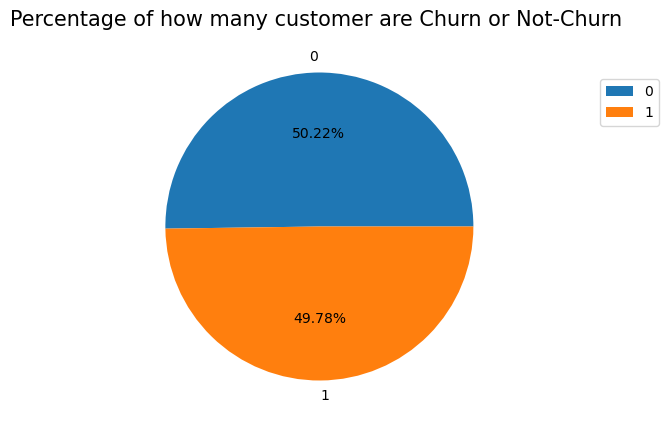

In [29]:
plt.figure(figsize=(5,5))
plt.pie(df['Churn'].value_counts(), labels = df['Churn'].unique(), autopct = '%.2f%%')
plt.title('Percentage of how many customer are Churn or Not-Churn ', fontsize=15)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9))

### Segregate the numerical and Categorical variables

In [30]:
categorical = [feature for feature in df.columns if df[feature].dtypes=='object']
df[categorical].sample(5)

,Gender,Location,Tenure_Group,Age_group
93154,Female,New York,yearly,Teeanager
420,Male,Chicago,1-2 year,midle_Age
33389,Male,Miami,1-2 year,midle_Age
29841,Male,Los Angeles,1-2 year,older
81117,Female,Chicago,Quatrly,midle_Age


In [31]:
numerical = [feature for feature in df.columns if df[feature].dtypes!='object']
df[numerical].sample(5)


,Monthly_Bill,Total_Usage_GB,Churn
86233,60,300,1
54622,88,388,0
88201,68,76,0
233,87,52,0
33659,42,420,1


### Statistical data analysis for Numerical features

In [32]:
df.describe(exclude=[object]).T

,count,mean,std,min,25%,50%,75%,max
Monthly_Bill,100000.0,64.55731,20.227941,30.0,47.0,65.0,82.0,100.0
Total_Usage_GB,100000.0,274.39365,130.463063,50.0,161.0,274.0,387.0,500.0
Churn,100000.0,0.49779,0.499998,0.0,0.0,0.0,1.0,1.0


Observations:

1.There is no column with single unique values

2.Null values is not present because the value of count for all columns are same (100000).

3.Skewness is not  present because not higher diffecence between 75% and max value of Monthly charges.

## Box plot

### check outliers¶

<AxesSubplot:>

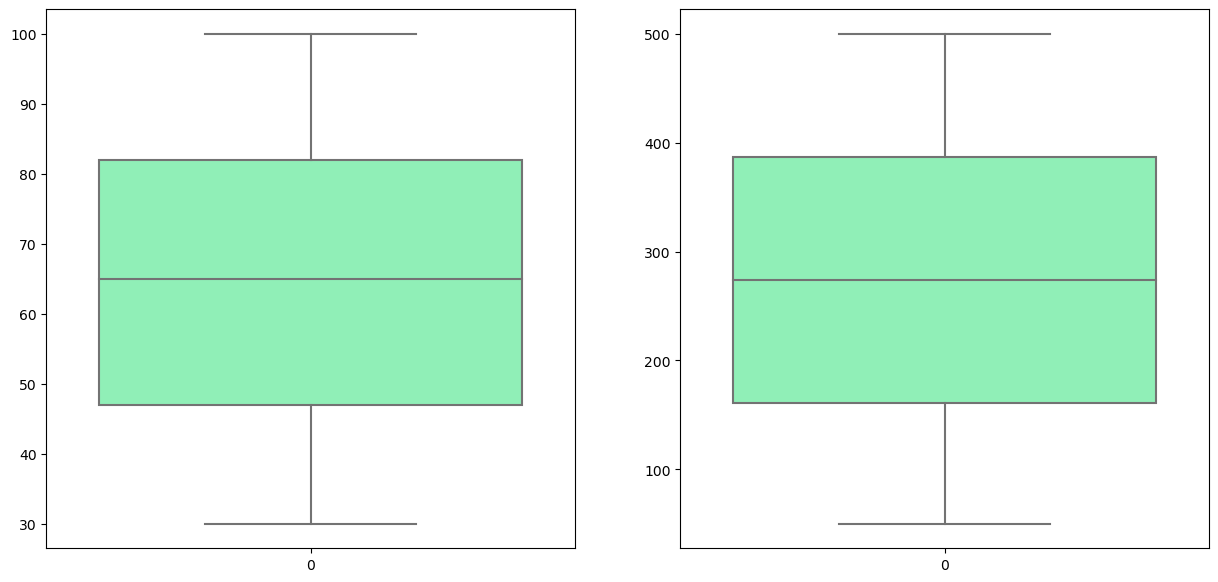

In [33]:
f, axes = plt.subplots( ncols=2, figsize=(15, 7))

sns.boxplot(data=df["Monthly_Bill"], palette='rainbow',ax = axes[0])
sns.boxplot(data=df["Total_Usage_GB"], palette='rainbow',ax = axes[1])

No outliers present in data sets.If any oulliers are present then we have to remove it by using Z-score or IQR technique.

### Dist PLot for skewness

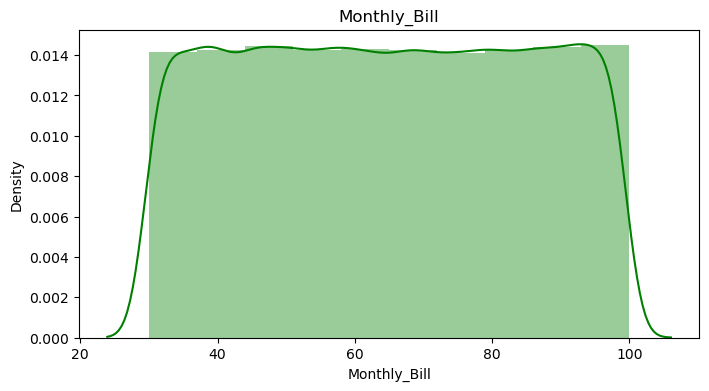

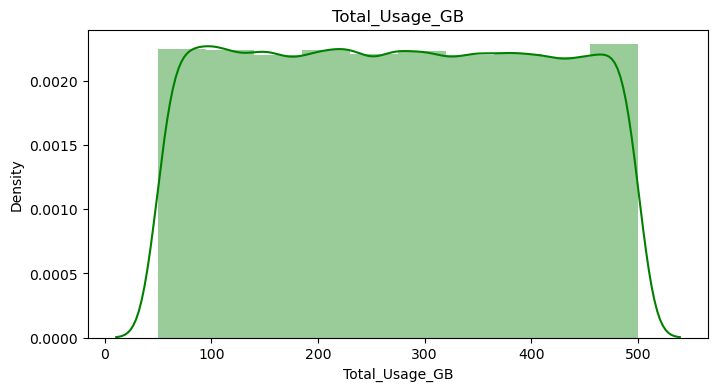

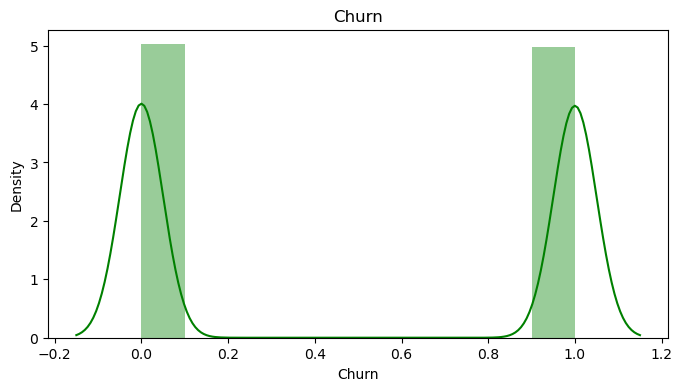

In [34]:
#Distribution plot for all numerical columns
for i in df.describe():              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="g")
    plt.title(i)
    plt.show()

our data is not skewed if skewness is present then we will use any power transform method for removeing it.

### Count Plot

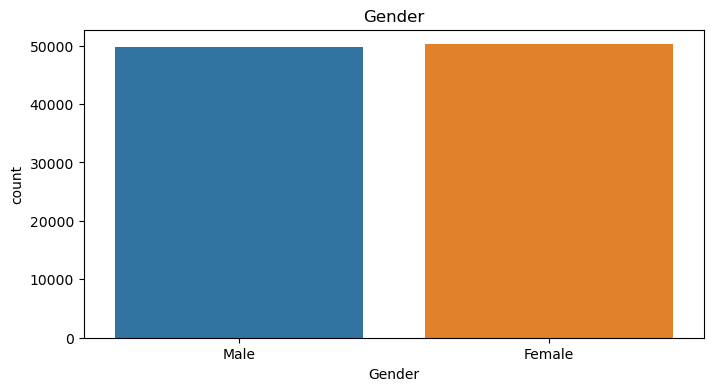

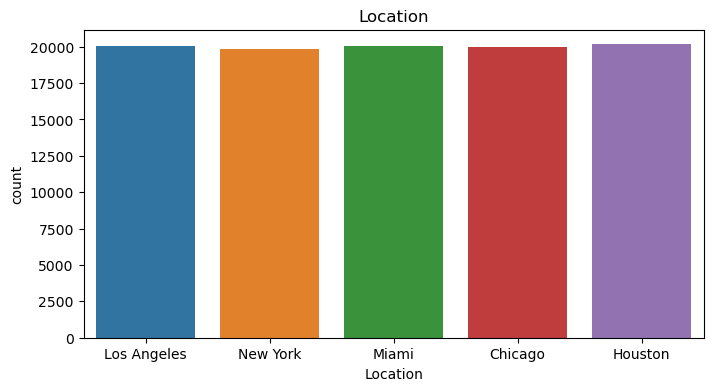

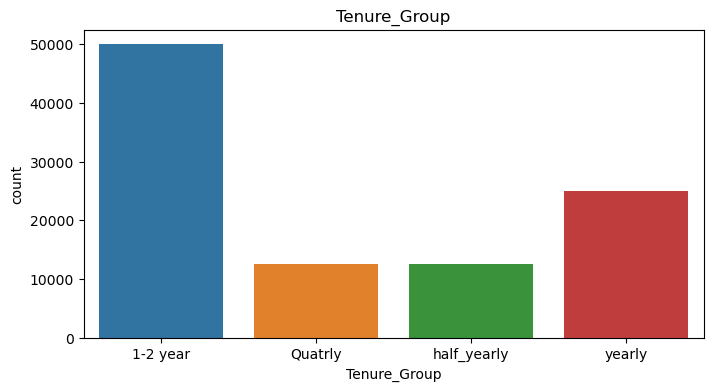

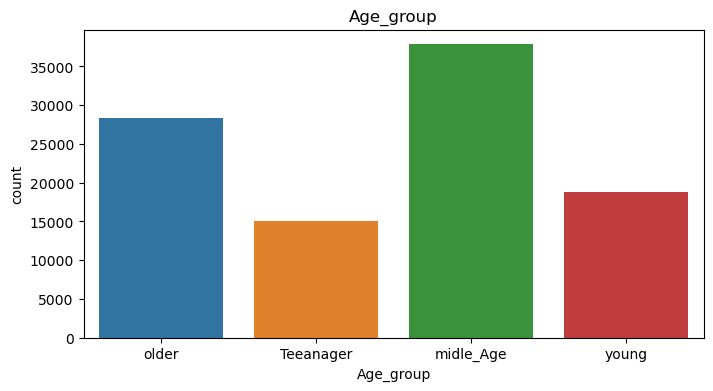

In [35]:
#Distribution plot for all numerical columns
for i in df[categorical]:              
    plt.figure(figsize = (8, 4))
    sns.countplot(x=df[i],data=df[categorical])
    plt.title(i)
    plt.show()

Observation:

1.The Tenure_Group is higher for 1-2 year as compare to other .So company have to focus the customer who is takeing quaterly plane

2.We have to focus the customer whois midle age or young because they have more chances to be good customes.

## Bivariate Analysis

### countplot of all columns with respect to churn

<AxesSubplot:xlabel='Churn', ylabel='count'>

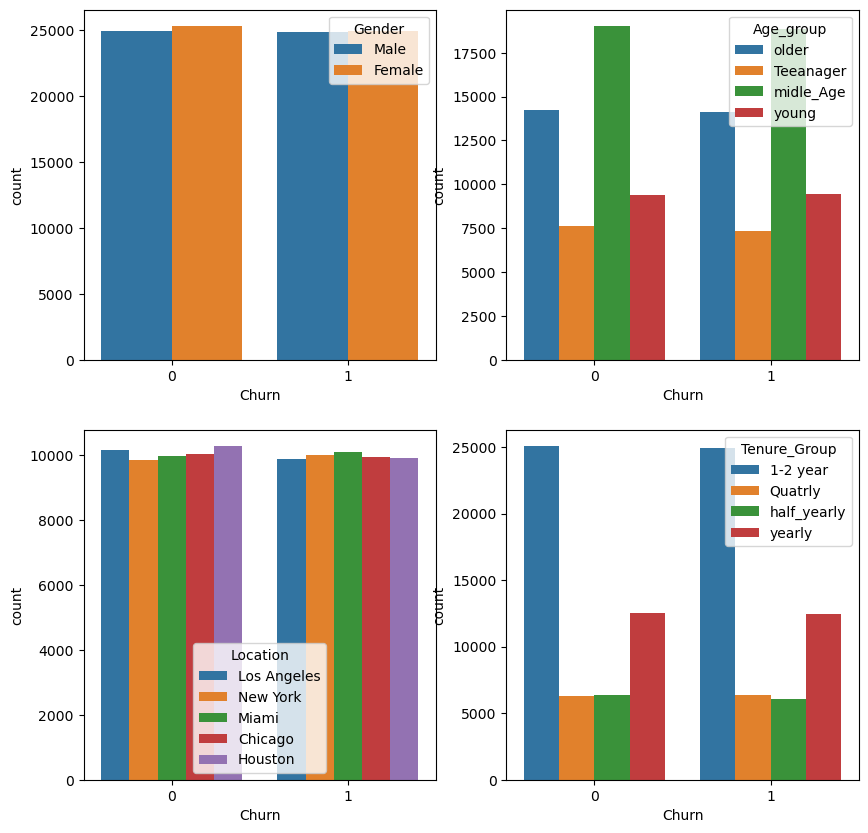

In [36]:
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

sns.countplot(df["Churn"],hue = df["Gender"],ax = axes[0,0])
sns.countplot(df["Churn"],hue = df["Age_group"],ax = axes[0,1])
sns.countplot(df["Churn"],hue = df["Location"],ax = axes[1,0])
sns.countplot(df["Churn"],hue = df["Tenure_Group"],ax = axes[1,1])


### Bivariate Analysis of numerical variable with churn rate

In [37]:
df.columns

Index(['Gender', 'Location', 'Monthly_Bill', 'Total_Usage_GB', 'Churn',
       'Tenure_Group', 'Age_group'],
      dtype='object')

<AxesSubplot:xlabel='Churn', ylabel='Total_Usage_GB'>

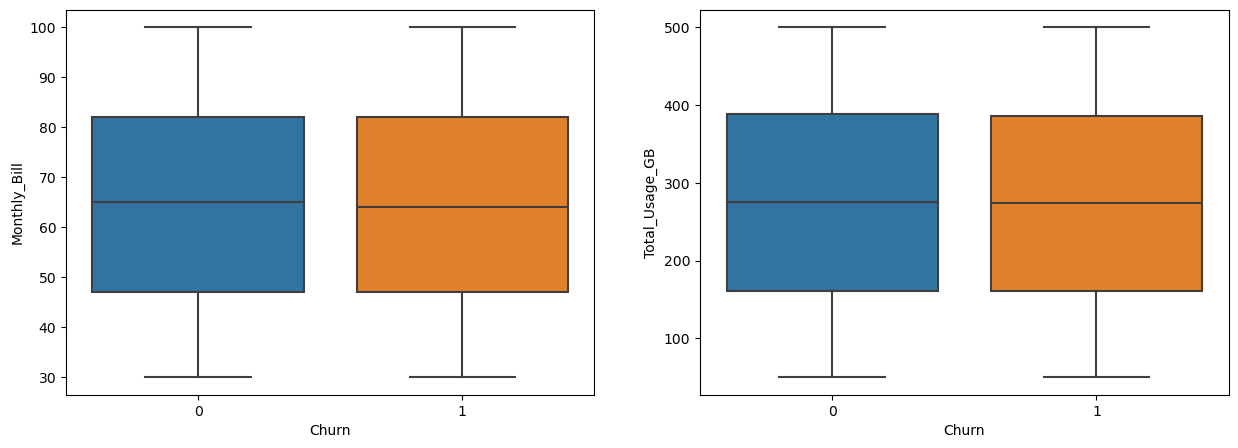

In [38]:
f, axes = plt.subplots( ncols=2, figsize=(15, 5))
sns.boxplot(x="Churn", y="Monthly_Bill", data=df,ax = axes[0])
sns.boxplot(x="Churn", y="Total_Usage_GB", data=df,ax = axes[1])

### Heatmap

<AxesSubplot:>

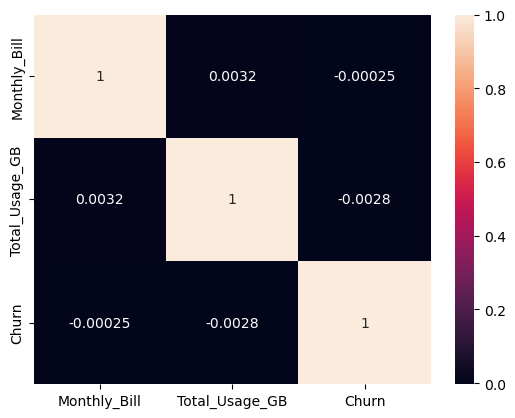

In [39]:
sns.heatmap(df.corr(),annot=True)

## Data Preprocessing

### Dealing with the categorical variable:-

convert categorical data into numerical variable by using Label encoading or one_hot_encoading technique

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [41]:
#for changing all catigorical value into numeric value

df=df.apply(le.fit_transform)

In [42]:
df.head()

,Gender,Location,Monthly_Bill,Total_Usage_GB,Churn,Tenure_Group,Age_group
0,1,2,43,186,0,0,2
1,0,4,18,122,0,1,2
2,0,2,55,410,0,2,0
3,0,3,67,247,1,1,1
4,0,3,28,216,0,0,1


## Model Building:-

### Churn is a target variable and it is binary type so I have to take classification models to predict.

### Feature and Label Selection:

In [43]:
x=df.drop("Churn",axis=1)
y=df["Churn"]

In [44]:
print(x.shape)
print(y.shape)

(100000, 6)
(100000,)


### Balancing the target dataset

In [45]:
y.value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

observed that data is imbalance so we need to do use oversampling or undersampling of label data.

In [46]:
from imblearn.over_sampling import SMOTE

smt=SMOTE()# instance of smote

In [47]:
trainx,trainy=smt.fit_resample(x,y)

In [48]:
trainy.value_counts()

0    50221
1    50221
Name: Churn, dtype: int64

,Importance
Features,
Total_Usage_GB,0.56482
Monthly_Bill,0.34877
Location,0.03142
Age_group,0.02715
Tenure_Group,0.02201
Gender,0.00584


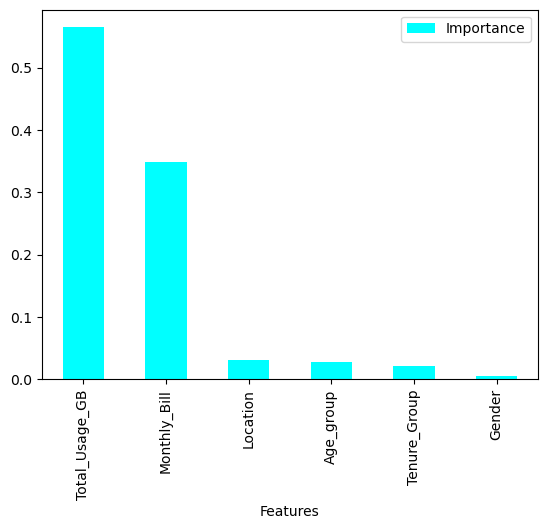

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
et=ExtraTreesClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30)
et.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(et.feature_importances_,5)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='cyan')
importances

### Multicollinerity

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif["vif_factor"]=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    return(vif)

In [51]:
cal_vif(x)

,variables,vif_factor
0,Gender,1.837295
1,Location,2.546238
2,Monthly_Bill,3.061124
3,Total_Usage_GB,3.074876
4,Tenure_Group,1.679897
5,Age_group,2.811787


### Data Standardization

Scaling the Feature data

In [52]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x=SC.fit_transform(x)
x

array([[ 1.00432937,  0.00294695,  0.41737972, -0.29428898, -0.88649792,
         0.50880942],
       [-0.99568929,  1.41974758, -0.8185407 , -0.78485174, -0.09771449,
         0.50880942],
       [-0.99568929,  0.00294695,  1.01062152,  1.42268068,  0.69106894,
        -1.56919356],
       ...,
       [ 1.00432937, -1.41385369,  1.5544265 , -0.17931334, -0.88649792,
         0.50880942],
       [-0.99568929,  1.41974758, -0.76910388,  1.22338955, -0.88649792,
        -0.53019207],
       [-0.99568929,  0.00294695,  0.56569017, -0.7771867 , -0.88649792,
         1.54781091]])

In [54]:
import pickle
pickle.dump(SC,open('scaler_churn.pkl','wb'))

## Model Building

### Train Test Split

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=100)

In [56]:
print("shape of x_train= ",x_train.shape)
print("shape of y_train= ",y_train.shape)
print("shape of x_test= ",x_test.shape)
print("shape of y_test= ",y_test.shape)

shape of x_train=  (80000, 6)
shape of y_train=  (80000,)
shape of x_test=  (20000, 6)
shape of y_test=  (20000,)


In [57]:
# Creating instances for different Classifiers
LR=LogisticRegression()
RF=RandomForestClassifier()
KNN=KNeighborsClassifier()
DT=DecisionTreeClassifier()
AD=AdaBoostClassifier()
GB=GradientBoostingClassifier()
KNN=KNeighborsClassifier()

In [58]:
# List of Models
models=[]
models.append(('LogisticRegression',LR))
models.append(('RandomForestClassifier',RF))
models.append(('KNeighborsClassifier',KNN))
models.append(('DecisionTreeClassifier',DT))
models.append(('AdaBoostClassifier',AD))
models.append(('GradientBoostingClassifier',GB))

In [59]:
# Finding best Random State and then calculate Maximum Accuracy Score
def max_acc_score(clf,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

In [62]:
# Lists to store model name, Learning score, Accuracy score, cross_val_score, Auc Roc score.

Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
lg_loss=[]

# For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix
for name,model in models:
    print('----------------------------------',name,'----------------------------')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')

    model.fit(x_train,y_train)

# Learning Score
    score=model.score(x_train,y_train)
    print('Train Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Test Score : ',acc_score)
    Acc_score.append(acc_score*100)


# Cross_val_score
    cv_score=cross_val_score(model,x,y,cv=5,scoring='roc_auc').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)

# Roc auc score
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)

# Log Loss
    loss = log_loss(y_test,y_pred)
    print('Log loss : ', loss)
    lg_loss.append(loss)

# Classification Report
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')

    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')


---------------------------------- LogisticRegression ----------------------------


LogisticRegression()


Train Score :  0.5048625
Test Score :  0.49815
Cross Val Score :  0.503629791022702
roc auc score :  0.4986224939251982
Log loss :  17.33339519827155
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.72      0.59      9979
           1       0.50      0.27      0.35     10021

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.47     20000
weighted avg       0.50      0.50      0.47     20000



Confusion Matrix:
 [[7221 2758]
 [7279 2742]]


---------------------------------- RandomForestClassifier ----------------------------


RandomForestClassifier()


Train Score :  0.9941125
Test Score :  0.4947
Cross Val Score :  0.5051650883850964
roc auc score :  0.49472717174682734
Log loss :  17.452640133457095
Classification Report:
               precision    recall  f1-score   sup

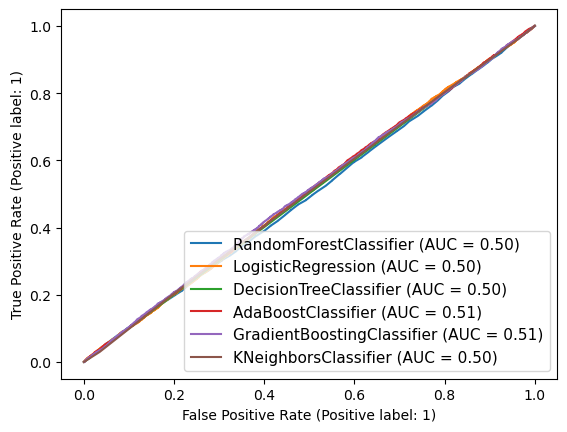

In [63]:
disp = plot_roc_curve(RF,x_test,y_test)
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)  # ax_=Axes with confusion matrix
plot_roc_curve(DT, x_test,y_test, ax=disp.ax_)
plot_roc_curve(AD, x_test,y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test,y_test, ax=disp.ax_)
plot_roc_curve(KNN, x_test,y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

In [64]:
# # Displaying scores :
results=pd.DataFrame({'Model': Model,'Learning Score': Score,'Accuracy Score': Acc_score,'Cross Val Score':cvs,
                     'AUC_score':rocscore,'Log_Loss':lg_loss})
results

,Model,Learning Score,Accuracy Score,Cross Val Score,AUC_score,Log_Loss
0,LogisticRegression,50.48625,49.815,50.362979,49.862249,17.333395
1,RandomForestClassifier,99.41125,49.470,50.516509,49.472717,17.452640
2,KNeighborsClassifier,69.00000,50.325,50.536036,50.325463,17.157334
3,DecisionTreeClassifier,99.41250,50.095,50.377655,50.095441,17.236775
4,AdaBoostClassifier,51.24750,50.190,50.560093,50.216996,17.203912
5,GradientBoostingClassifier,53.11750,50.705,50.581763,50.729069,17.026041


### Hyperparameter Tuning
Looking at all the Scores, I have selected Random Forest as a best model because different between Accuracy score and CVS is minimum and use RandomizedSearchCv for hyperparameter tunning.

In [65]:
from sklearn.model_selection import RandomizedSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.30,stratify=y)
parameters={'bootstrap': [True, False],
 'max_depth': [10, 50, 100, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 300, 500, 800, 1200]}


RFC=RandomForestClassifier()

# Applying Randomized Search CV for hyperparameter tuning with scoring= "accuracy"
rand = RandomizedSearchCV(estimator = RFC, param_distributions = parameters, 
                          n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1,scoring='accuracy')
rand.fit(x_train,y_train)
rand.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 50,
 'bootstrap': True}

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.30,stratify=y)
RFC=RandomForestClassifier(n_estimators= 300,
                           min_samples_split= 10,
                           min_samples_leaf=1,
                           max_depth= 50,
                           bootstrap= True)
RFC.fit(x_train,y_train)
RFC.score(x_train,y_train)
pred=RFC.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,pred))
print('Log loss : ', log_loss(y_test,pred))
print('Confusion Matrix:',confusion_matrix(y_test,pred))
print('Classification Report:','\n',classification_report(y_test,pred))

Accuracy Score: 0.5053333333333333
Log loss :  17.085375692191356
Confusion Matrix: [[7776 7290]
 [7550 7384]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.52      0.51     15066
           1       0.50      0.49      0.50     14934

    accuracy                           0.51     30000
   macro avg       0.51      0.51      0.51     30000
weighted avg       0.51      0.51      0.51     30000



(2.5, -0.5)

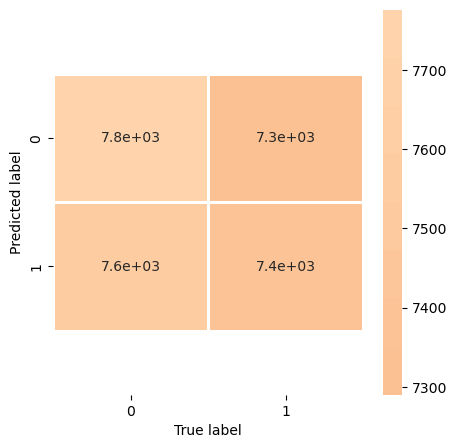

In [67]:
# Confusion matrix Visualization
fig, ax =plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, pred),annot=True,linewidths=1,center=0)
plt.xlabel("True label")
plt.ylabel("Predicted label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Text(0.5, 1.0, 'Random Forest Classifier')

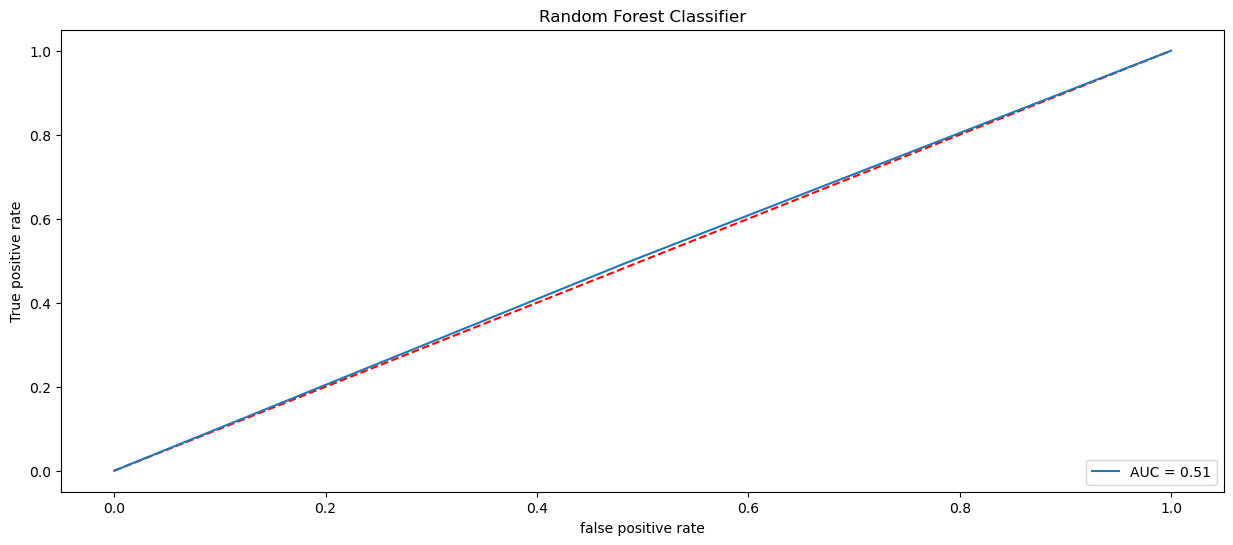

In [68]:
# Roc-Auc score
f,ax = plt.subplots(figsize = (15,6))
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, pred)
ax.plot([0,1],[0,1],'r--')
ax.plot(fpr,tpr,label='AUC = %0.2f'% roc_auc_score(y_test, pred))
ax.legend(loc='lower right')
ax.set_xlabel('false positive rate')
ax.set_ylabel('True positive rate')
ax.set_title('Random Forest Classifier')

### Pipeline:

In [69]:
from sklearn.pipeline import Pipeline
pipeline_randomforest =  Pipeline([('SC', StandardScaler()),
                               ('rf_classifier',RandomForestClassifier())])

In [70]:
pipeline_randomforest.fit(x_train,y_train)
pred = pipeline_randomforest.predict(x_test)
accuracy_score(y_test,pred) 

0.5031333333333333

### Saving ,Loading and Prediction of the best Classification ML model

In [71]:
import pickle
pickle.dump(RFC,open("Churn_final.pkl","wb"))

In [72]:
loaded_model=pickle.load(open("Churn_final.pkl","rb"))

In [73]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=["predicted","original"])

In [74]:
conclusion.T

,predicted,original
0,0,0
1,0,0
2,1,0
3,1,1
4,1,1
...,...,...
29995,0,0
29996,0,0
29997,0,0
29998,1,1
